In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
from sklearn.preprocessing import StandardScaler

# Data Preparation

In [3]:
df_train = pd.read_csv('trainset.csv') 
df_test = pd.read_csv('testset.csv')

In [4]:
columns_to_remove = ['endYear','awardWins', 'worstRating', 'bestRating', 'totalCredits', 'awardNominationsExcludeWins', 'externalLinks'
                    , 'isRatable']

# Loại bỏ các cột khỏi dataset 'trainset'
df_train= df_train.drop(columns=columns_to_remove)
# Loại bỏ các cột khỏi dataset 'testset'
df_test = df_test.drop(columns=columns_to_remove)

In [5]:
my_dict = {
    '0 - 4': 0,
    '4 - 6': 1,
    '6 - 7': 2,
    '7 - 8': 3,
    '8 - 9': 4,
    '9 - 10': 5
}
df_train['rating'] = df_train['rating'].map(my_dict)
df_test['rating'] = df_test['rating'].map(my_dict)


In [6]:
X_train = df_train.drop(columns=["rating"])
y_train = df_train["rating"]
X_test = df_test.drop(columns=["rating"])
y_test = df_test["rating"]

In [7]:
df_train.dtypes

rating                  int64
startYear               int64
runtimeMinutes        float64
totalImages             int64
totalVideos             int64
criticReviewsTotal      int64
titleType             float64
canHaveEpisodes         int64
isAdult                 int64
numRegions              int64
userReviewsTotal        int64
ratingCount             int64
genres                float64
castNumber              int64
companiesNumber         int64
regions               float64
writerCredits           int64
directorsCredits        int64
soundMixes            float64
quotesTotal             int64
continent             float64
ratewinningawards     float64
dtype: object

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

# Fit on training data, then transform both train and test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

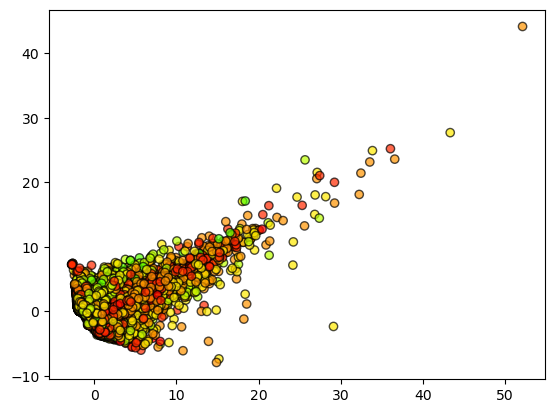

In [11]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# Linear SVM

In [9]:
from sklearn.svm import LinearSVC

In [10]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [14]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4011307070297543
F1-score [0.         0.47172462 0.19352424 0.53640866 0.00060772 0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1545
           1       0.39      0.59      0.47      9039
           2       0.35      0.13      0.19     11565
           3       0.42      0.76      0.54     14400
           4       0.14      0.00      0.00      6568
           5       0.00      0.00      0.00      1280

    accuracy                           0.40     44397
   macro avg       0.22      0.25      0.20     44397
weighted avg       0.33      0.40      0.32     44397



C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [15]:
clf = LinearSVC(C=100.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4011307070297543
F1-score [0.         0.47172462 0.19352424 0.53640866 0.00060772 0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1545
           1       0.39      0.59      0.47      9039
           2       0.35      0.13      0.19     11565
           3       0.42      0.76      0.54     14400
           4       0.14      0.00      0.00      6568
           5       0.00      0.00      0.00      1280

    accuracy                           0.40     44397
   macro avg       0.22      0.25      0.20     44397
weighted avg       0.33      0.40      0.32     44397



C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [16]:
clf = LinearSVC(C=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.40115323107417167
F1-score [0.         0.471757   0.19405029 0.53651803 0.00060772 0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1545
           1       0.39      0.59      0.47      9039
           2       0.35      0.13      0.19     11565
           3       0.42      0.76      0.54     14400
           4       0.14      0.00      0.00      6568
           5       0.00      0.00      0.00      1280

    accuracy                           0.40     44397
   macro avg       0.22      0.25      0.20     44397
weighted avg       0.33      0.40      0.32     44397



C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manht\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

## tuning for linear SVM

In [11]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
# Giả sử bạn đã có sẵn dữ liệu X_train, y_train, X_test, y_test
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_classification
#
# # Tạo dữ liệu mẫu (thay thế bằng dữ liệu thật của bạn)
# # Tạo dữ liệu mất cân bằng để thấy rõ tác dụng của class_weight
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=5,
#                            n_redundant=2, n_classes=2, n_clusters_per_class=2,
#                            weights=[0.9, 0.1], flip_y=0, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# 1. Định nghĩa không gian siêu tham số
# Chúng ta có thể thêm 'class_weight' vào đây để GridSearchCV tự tìm
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'dual': [False]
}

# 2. Khởi tạo mô hình LinearSVC
# Thêm class_weight='balanced' trực tiếp vào mô hình
# Thêm max_iter để đảm bảo mô hình hội tụ
lsvc = LinearSVC(random_state=42, max_iter=10000, class_weight='balanced')

# 3. Sử dụng GridSearchCV với F1-macro scoring
# Cập nhật tham số scoring thành 'f1_macro'
clf = GridSearchCV(lsvc, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# 4. Huấn luyện mô hình
clf.fit(X_train, y_train)

# 5. In ra các kết quả tốt nhất
print("Bộ tham số tốt nhất được tìm thấy là:")
print(clf.best_params_)
print(f"\nF1-score (macro) tốt nhất trên tập validation là: {clf.best_score_:.4f}")

# 6. Đánh giá mô hình với bộ tham số tốt nhất trên tập test
y_pred = clf.predict(X_test)

print('\n--- Kết quả trên tập Test với tham số tốt nhất ---')
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Bộ tham số tốt nhất được tìm thấy là:
{'C': 0.01, 'dual': False, 'penalty': 'l1'}

F1-score (macro) tốt nhất trên tập validation là: 0.2400

--- Kết quả trên tập Test với tham số tốt nhất ---
Accuracy: 0.3495
F1-score (macro): 0.2424

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.16      0.12      1545
           1       0.39      0.58      0.47      9039
           2       0.37      0.07      0.12     11565
           3       0.46      0.57      0.51     14400
           4       0.22      0.05      0.09      6568
           5       0.09      0.44      0.15      1280

    accuracy                           0.35     44397
   macro avg       0.27      0.31      0.24     44397
weighted avg       0.36      0.35      0.31     44397



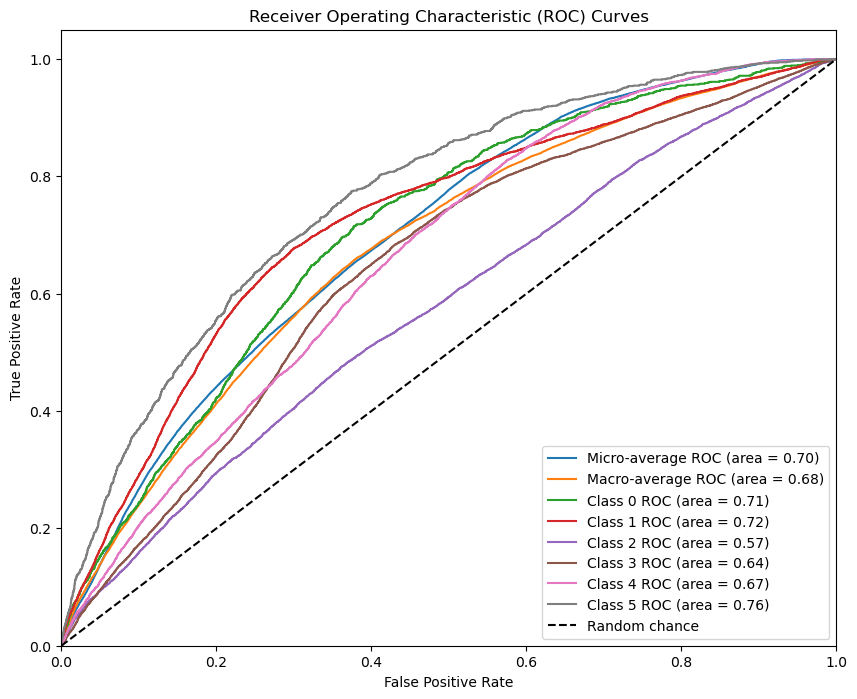

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# 1. Binarize y_test thành ma trận one-hot
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# 2. Lấy xác suất từ mô hình LinearSVC đã huấn luyện
# Sử dụng predict_proba hoặc decision_function, LinearSVC sử dụng decision_function
y_score = clf.decision_function(X_test)

# 3. Tính toán ROC và AUC cho từng lớp
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Micro-average ROC curve và AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# 5. Macro-average ROC curve và AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# 6. Vẽ đồ thị ROC
plt.figure(figsize=(10, 8))

# Vẽ micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC (area = {roc_auc["micro"]:.2f})')

# Vẽ macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average ROC (area = {roc_auc["macro"]:.2f})')

# Vẽ ROC curve cho từng lớp
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC (area = {roc_auc[i]:.2f})')

# Đường tham chiếu (random chance)
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

# Thiết lập nhãn và tiêu đề
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')

# Thêm chú thích
plt.legend(loc='lower right')

# Hiển thị đồ thị
plt.show()


In [13]:
import os

# In ra đường dẫn hiện tại
current_directory = os.getcwd()
print("Đường dẫn hiện tại là:", current_directory)


Đường dẫn hiện tại là: C:\Users\manht\Data Mining sem 2


Hình ảnh đã được lưu tại: C:\Users\manht\Data Mining sem 2\linearSVM_roc_curve_plot.png


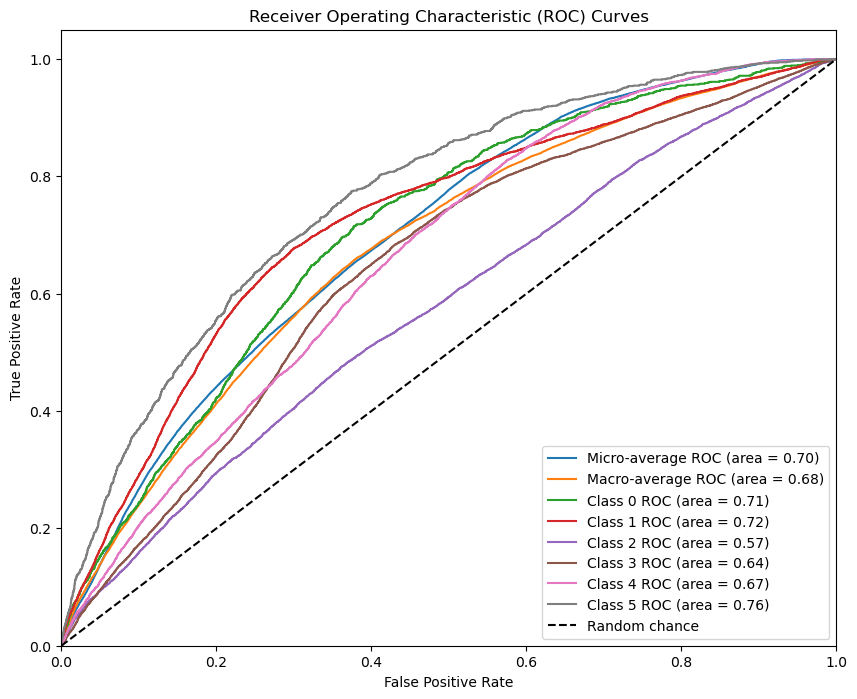

In [15]:
# Định nghĩa đường dẫn lưu tệp
save_path = os.path.join(current_directory, 'linearSVM_roc_curve_plot.png')

# Lưu hình ảnh vào file
plt.figure(figsize=(10, 8))

# Vẽ micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC (area = {roc_auc["micro"]:.2f})')

# Vẽ macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average ROC (area = {roc_auc["macro"]:.2f})')

# Vẽ ROC curve cho từng lớp
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC (area = {roc_auc[i]:.2f})')

# Đường tham chiếu (random chance)
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

# Thiết lập nhãn và tiêu đề
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')

# Thêm chú thích
plt.legend(loc='lower right')

# Lưu hình ảnh vào tệp
plt.savefig(save_path)

# Thông báo người dùng về vị trí tệp
print(f"Hình ảnh đã được lưu tại: {save_path}")


# Non linear SVM

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [18]:
svc = SVC(C=1, gamma=0.25, random_state=0)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Support Vector Classification'
#cm_svc = confusion_matrix(y_test,y_pred)
# draw_confusion_matrix(cm_svc, model)

Accuracy 0.4317859314818569
F1-score [0.02391441 0.48510009 0.33127041 0.54928916 0.08632302 0.0942029 ]
              precision    recall  f1-score   support

           0     0.4318    0.0123    0.0239      1545
           1     0.4991    0.4718    0.4851      9039
           2     0.3795    0.2939    0.3313     11565
           3     0.4265    0.7714    0.5493     14400
           4     0.4441    0.0478    0.0863      6568
           5     0.6500    0.0508    0.0942      1280

    accuracy                         0.4318     44397
   macro avg     0.4718    0.2747    0.2617     44397
weighted avg     0.4383    0.4318    0.3795     44397



NameError: name 'confusion_matrix' is not defined

In [21]:
svc = SVC(C=1, gamma=0.1, random_state=0)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Support Vector Classification'
#cm_svc = confusion_matrix(y_test,y_pred)
# draw_confusion_matrix(cm_svc, model)

Accuracy 0.4273036466427912
F1-score [0.01401274 0.4885921  0.31104992 0.54646786 0.05584491 0.00311769]
              precision    recall  f1-score   support

           0     0.4400    0.0071    0.0140      1545
           1     0.4915    0.4857    0.4886      9039
           2     0.3791    0.2637    0.3110     11565
           3     0.4187    0.7865    0.5465     14400
           4     0.5610    0.0294    0.0558      6568
           5     0.6667    0.0016    0.0031      1280

    accuracy                         0.4273     44397
   macro avg     0.4928    0.2623    0.2365     44397
weighted avg     0.4522    0.4273    0.3666     44397



In [ ]:
svc = SVC(C=10, gamma=0.01, random_state=0)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Support Vector Classification'
#cm_svc = confusion_matrix(y_test,y_pred)
# draw_confusion_matrix(cm_svc, model)

In [ ]:
svc = SVC(C=10, gamma=0.001, random_state=0)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Support Vector Classification'
#cm_svc = confusion_matrix(y_test,y_pred)
# draw_confusion_matrix(cm_svc, model)

In [ ]:
svc = SVC(C=10, gamma=0.0001, random_state=0)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Support Vector Classification'
#cm_svc = confusion_matrix(y_test,y_pred)
# draw_confusion_matrix(cm_svc, model)

In [ ]:
svc = SVC(C=100, gamma=0.01, random_state=0)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Support Vector Classification'
#cm_svc = confusion_matrix(y_test,y_pred)
# draw_confusion_matrix(cm_svc, model)

In [ ]:
svc = SVC(C=100, gamma=0.001, random_state=0)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Support Vector Classification'
#cm_svc = confusion_matrix(y_test,y_pred)
# draw_confusion_matrix(cm_svc, model)

In [ ]:
svc = SVC(C=100, gamma=0.1, random_state=0)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Support Vector Classification'
#cm_svc = confusion_matrix(y_test,y_pred)
# draw_confusion_matrix(cm_svc, model)

In [12]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.42268621753722097
F1-score [0.01154586 0.48759715 0.29659256 0.54462788 0.03566166 0.00156006]
              precision    recall  f1-score   support

           0       0.64      0.01      0.01      1545
           1       0.47      0.51      0.49      9039
           2       0.37      0.25      0.30     11565
           3       0.42      0.78      0.54     14400
           4       0.56      0.02      0.04      6568
           5       0.50      0.00      0.00      1280

    accuracy                           0.42     44397
   macro avg       0.49      0.26      0.23     44397
weighted avg       0.45      0.42      0.36     44397



In [ ]:
clf = SVC(gamma='auto', C=0.1, kernel='rbf', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# CHIA NHỎ DATASET ĐỂ CHẠY

## CHIA NHỎ TRAINSET

In [11]:
df_train

,rating,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,titleType,canHaveEpisodes,isAdult,numRegions,...,genres,castNumber,companiesNumber,regions,writerCredits,directorsCredits,soundMixes,quotesTotal,continent,ratewinningawards
0,4,1972,30.0,0,0,0,0.478478,0,0,0,...,0.000507,5,2,0.235246,1,1,0.361396,0,0.629360,0.0
1,4,1979,92.0,1,0,0,0.242935,0,0,1,...,0.005926,17,2,0.002054,1,1,0.361396,0,0.096216,0.4
2,5,2018,20.0,3,0,8,0.478478,0,0,0,...,0.005291,5,2,0.235246,2,2,0.553848,0,0.629360,0.0
3,3,2012,30.0,0,0,0,0.478478,0,0,0,...,0.000311,1,4,0.235246,0,0,0.553848,0,0.629360,0.0
4,4,2005,30.0,1,0,0,0.478478,0,0,0,...,0.013386,15,2,0.235246,1,1,0.553848,0,0.629360,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103588,4,1992,30.0,0,0,0,0.478478,0,0,7,...,0.001676,24,0,0.054781,1,1,0.553848,0,0.629360,0.0
103589,3,2012,112.0,2,0,4,0.242935,0,0,2,...,0.000845,12,4,0.000081,1,1,0.000088,0,0.096216,1.0
103590,3,1963,75.0,10,0,1,0.478478,0,0,1,...,0.011663,13,3,0.211758,1,1,0.361396,20,0.629360,0.0
103591,3,1967,3.0,0,0,0,0.110643,0,0,1,...,0.015224,2,2,0.211758,0,0,0.361396,0,0.629360,0.0


In [12]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# Giả sử df_train là DataFrame của bạn
# df_train = pd.read_csv('your_dataset.csv')

# Xác định biến phân loại (rating)
X = df_train.drop('rating', axis=1)  # Các thuộc tính ngoài rating
y = df_train['rating']  # Thuộc tính rating

# Tạo StratifiedKFold để chia thành 10 phần
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Duyệt qua các phân chia và tạo các biến df1, df2, ..., df10
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Tạo subset từ các chỉ số được chia
    subset = df_train.iloc[test_index]
    # Tạo tên biến động cho mỗi subset và gán nó cho biến
    globals()[f'df{i}'] = subset

# bây giờ bạn có các biến df1, df2, ..., df10, mỗi biến là một subset


In [13]:
df1

,rating,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,titleType,canHaveEpisodes,isAdult,numRegions,...,genres,castNumber,companiesNumber,regions,writerCredits,directorsCredits,soundMixes,quotesTotal,continent,ratewinningawards
9,3,1959,30.0,0,0,0,0.478478,0,0,0,...,0.013623,15,6,0.235246,2,1,0.361396,0,0.629360,0.0
22,2,1991,30.0,2,0,0,0.478478,0,0,1,...,0.013386,11,8,0.211758,4,1,0.553848,2,0.629360,0.0
24,2,1921,20.0,12,0,3,0.110643,0,0,1,...,0.015224,16,2,0.211758,0,1,0.022907,0,0.629360,0.0
26,2,1974,140.0,14,0,0,0.242935,0,0,1,...,0.001041,48,12,0.018940,4,1,0.361396,0,0.096216,0.0
33,1,2021,6.0,2,0,0,0.110643,0,0,1,...,0.000034,2,1,0.211758,0,1,0.553848,0,0.629360,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103574,3,2024,60.0,2,0,1,0.478478,0,0,0,...,0.048186,32,0,0.235246,0,1,0.553848,0,0.629360,0.0
103578,4,2012,4.0,1,0,0,0.110643,0,0,1,...,0.000115,0,0,0.211758,0,1,0.553848,0,0.629360,0.0
103581,3,2016,23.0,0,0,0,0.478478,0,0,1,...,0.001108,27,6,0.001473,5,2,0.553848,0,0.218177,0.0
103586,3,2018,30.0,6,0,0,0.478478,0,0,7,...,0.080397,19,2,0.054781,1,1,0.553848,0,0.629360,0.0


In [14]:
# Tính tổng số lượng mỗi lớp trong thuộc tính 'rating'
rating_counts = df1['rating'].value_counts()

# In kết quả
print(rating_counts)

rating
3    3360
2    2698
1    2109
4    1533
0     361
5     299
Name: count, dtype: int64


In [15]:
# Tính tổng số lượng mỗi lớp trong thuộc tính 'rating'
rating_counts = df2['rating'].value_counts()

# In kết quả
print(rating_counts)

rating
3    3360
2    2698
1    2109
4    1533
0     361
5     299
Name: count, dtype: int64


In [16]:
# Lưu df1, df2, df3 vào các file CSV
df1.to_csv('df1_SVM.csv', index=False)
df2.to_csv('df2_SVM.csv', index=False)
df3.to_csv('df3_SVM.csv', index=False)

## CHIA NHỎ TESTSET

In [17]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# Giả sử df_train là DataFrame của bạn
# df_train = pd.read_csv('your_dataset.csv')

# Xác định biến phân loại (rating)
X = df_test.drop('rating', axis=1)  # Các thuộc tính ngoài rating
y = df_test['rating']  # Thuộc tính rating

# Tạo StratifiedKFold để chia thành 10 phần
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Duyệt qua các phân chia và tạo các biến df1, df2, ..., df10
for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    # Tạo subset từ các chỉ số được chia
    subset = df_test.iloc[test_index]
    # Tạo tên biến động cho mỗi subset và gán nó cho biến
    globals()[f'test{i}'] = subset

# bây giờ bạn có các biến df1, df2, ..., df10, mỗi biến là một subset

In [18]:
test1

,rating,startYear,runtimeMinutes,totalImages,totalVideos,criticReviewsTotal,titleType,canHaveEpisodes,isAdult,numRegions,...,genres,castNumber,companiesNumber,regions,writerCredits,directorsCredits,soundMixes,quotesTotal,continent,ratewinningawards
11,1,2010,28.0,0,0,0,0.040888,0,0,1,...,0.048186,4,2,0.211758,0,0,0.553848,0,0.629360,0.0
41,3,1968,13.0,20,0,3,0.110643,0,0,8,...,0.019076,3,3,0.000007,2,1,0.361396,0,0.218177,0.0
61,4,2013,17.0,3,0,0,0.110643,0,0,1,...,0.001041,25,1,0.211758,1,1,0.553848,0,0.629360,0.0
76,1,2007,88.0,1,0,0,0.478478,0,0,1,...,0.020988,10,2,0.010737,2,1,0.553848,0,0.218177,0.0
77,3,2019,52.0,1,0,0,0.478478,0,0,7,...,0.000635,28,2,0.054781,2,1,0.553848,0,0.218177,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44350,2,1994,55.0,1,0,0,0.011954,0,0,1,...,0.004048,0,2,0.211758,0,0,0.553848,0,0.629360,0.0
44357,2,1978,79.0,1,0,0,0.242935,0,0,4,...,0.000399,28,1,0.000007,2,1,0.361396,0,0.629360,0.0
44372,2,1980,30.0,9,0,1,0.040888,0,0,1,...,0.016866,6,13,0.211758,1,1,0.553848,3,0.629360,0.0
44378,2,2013,49.0,1,0,0,0.478478,0,0,0,...,0.005298,18,0,0.235246,1,1,0.553848,0,0.629360,0.0


In [19]:
# Lưu  file CSV
test1.to_csv('test1_SVM.csv', index=False)
test2.to_csv('test2_SVM.csv', index=False)
test3.to_csv('test3_SVM.csv', index=False)

# TUNNING VỚI DF1

In [4]:
df1 = pd.read_csv('df1_SVM.csv') 
test1 = pd.read_csv('test1_SVM.csv')

In [5]:
df_train_1 = df1.drop(columns=["rating"])
y1_train = df1["rating"]
X_test_1 = test1.drop(columns=["rating"])
y_test_1 = test1["rating"]

### Cố định kernel rbf

In [7]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
             'kernel': ['rbf']},
                
]

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0
)

optimal_params.fit(df_train_1,y1_train)
print(optimal_params.best_params_)

{'C': 100, 'kernel': 'rbf'}


In [12]:
param_grid=[
            {'C': [100],
             'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']},
                
]

In [13]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0
)

optimal_params.fit(df_train_1,y1_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [16]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
              'gamma': ['auto','scale',1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']},
                
]

In [17]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0
)

optimal_params.fit(df_train_1,y1_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


### Cố định kernel poly

In [11]:
param_grid=[
            {'C': [0.001,0.01,0.1,1,10,100],
             'kernel': ['poly'],
            'gamma': ['scale']}                
]

In [12]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced', degree=2),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
    n_jobs=-1,
)

optimal_params.fit(df_train_1,y1_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'poly'}


# TUNNING VỚI DF2

In [13]:
df2 = pd.read_csv('df2_SVM.csv') 
test2 = pd.read_csv('test2_SVM.csv')

In [14]:
df_train_2 = df2.drop(columns=["rating"])
y2_train = df2["rating"]
X_test_2 = test2.drop(columns=["rating"])
y_test_2 = test2["rating"]

In [15]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced', degree=2),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
    n_jobs=-1,
)

optimal_params.fit(df_train_2,y2_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'poly'}


# TUNNING VỚI DF3

In [16]:
df3 = pd.read_csv('df3_SVM.csv') 
test3 = pd.read_csv('test3_SVM.csv')

In [17]:
df_train_3 = df3.drop(columns=["rating"])
y3_train = df3["rating"]
X_test_3 = test3.drop(columns=["rating"])
y_test_3 = test3["rating"]

In [18]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced', degree=2),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
    n_jobs=-1,
)

optimal_params.fit(df_train_3,y3_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'poly'}


# TUNNING VỚI DF4

In [19]:
df4 = pd.read_csv('df4_SVM.csv') 
test4 = pd.read_csv('test4_SVM.csv')

In [20]:
df_train_4 = df4.drop(columns=["rating"])
y4_train = df4["rating"]
X_test_4 = test4.drop(columns=["rating"])
y_test_4 = test4["rating"]

In [21]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced', degree=2),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
    n_jobs=-1,
)

optimal_params.fit(df_train_4,y4_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'poly'}


# TUNNING VỚI DF5

In [22]:
df5 = pd.read_csv('df5_SVM.csv') 
test5 = pd.read_csv('test5_SVM.csv')

In [23]:
df_train_5 = df5.drop(columns=["rating"])
y5_train = df5["rating"]
X_test_5= test5.drop(columns=["rating"])
y_test_5 = test5["rating"]

In [24]:
optimal_params = GridSearchCV(
    SVC(class_weight='balanced', degree=2),
    param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=0,
    n_jobs=-1,
)

optimal_params.fit(df_train_5,y5_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'poly'}


# FINAL CHECK MODEL AFTER TUNING

## {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [13]:
svc = SVC(C=100, gamma=0.001, kernel='rbf',  class_weight='balanced', random_state=42)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Support Vector Classification'
#cm_svc = confusion_matrix(y_test,y_pred)
# draw_confusion_matrix(cm_svc, model)

Accuracy 0.2658287722143388
F1-score [0.16018012 0.41400093 0.15276196 0.37272492 0.20891528 0.12903226]
              precision    recall  f1-score   support

           0     0.0960    0.4835    0.1602      1545
           1     0.4347    0.3952    0.4140      9039
           2     0.4321    0.0928    0.1528     11565
           3     0.4918    0.3001    0.3727     14400
           4     0.2318    0.1902    0.2089      6568
           5     0.0716    0.6562    0.1290      1280

    accuracy                         0.2658     44397
   macro avg     0.2930    0.3530    0.2396     44397
weighted avg     0.4003    0.2658    0.2852     44397



## {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [14]:
svc = SVC(C=10, gamma='scale', kernel='sigmoid',  class_weight='balanced', random_state=42)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'Support Vector Classification'
#cm_svc = confusion_matrix(y_test,y_pred)
# draw_confusion_matrix(cm_svc, model)

Accuracy 0.15753316665540465
F1-score [0.07634824 0.22207684 0.09732428 0.22909854 0.16111625 0.10454263]
              precision    recall  f1-score   support

           0     0.0422    0.3968    0.0763      1545
           1     0.2401    0.2065    0.2221      9039
           2     0.2454    0.0607    0.0973     11565
           3     0.3854    0.1630    0.2291     14400
           4     0.1632    0.1591    0.1611      6568
           5     0.0622    0.3281    0.1045      1280

    accuracy                         0.1575     44397
   macro avg     0.1898    0.2190    0.1484     44397
weighted avg     0.2652    0.1575    0.1744     44397



## {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}

In [14]:
# Import các thư viện và hàm cần thiết
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
# Giả sử X_train, y_train, X_test, y_test đã được định nghĩa ở đâu đó
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- KHỞI TẠO VÀ HUẤN LUYỆN MODEL ---
svc = SVC(C=100, gamma='scale', kernel='poly', class_weight='balanced', random_state=42, degree=2, probability=True)
svc.fit(X_train, y_train)

# --- ĐÁNH GIÁ TRÊN TẬP KIỂM TRA (TEST SET) ---
y_pred = svc.predict(X_test)

print("--- ĐÁNH GIÁ TRÊN TẬP KIỂM TRA ---")
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))
print("-" * 40)

# Nếu bạn muốn vẽ confusion matrix, hãy bỏ comment các dòng dưới
# model = 'Support Vector Classification'
# cm_svc = confusion_matrix(y_test,y_pred)
# draw_confusion_matrix(cm_svc, model) # Đảm bảo hàm draw_confusion_matrix đã được định nghĩa

# --- ĐÁNH GIÁ TRÊN TẬP HUẤN LUYỆN (TRAINING SET) ---
print("--- ĐÁNH GIÁ TRÊN TẬP HUẤN LUYỆN ---")
y_pred_train = svc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f"Training Accuracy: {train_accuracy:.4f}")
print("Classification Report (Training):")
print(classification_report(y_train, y_pred_train, digits=4))
print("-" * 40)


--- ĐÁNH GIÁ TRÊN TẬP KIỂM TRA ---
Accuracy 0.2766177894902809
F1-score [0.16312897 0.39782367 0.15186633 0.41415571 0.19634824 0.13389734]
Classification Report:
              precision    recall  f1-score   support

           0     0.0979    0.4900    0.1631      1545
           1     0.4222    0.3761    0.3978      9039
           2     0.4272    0.0923    0.1519     11565
           3     0.4959    0.3556    0.4142     14400
           4     0.2334    0.1695    0.1963      6568
           5     0.0747    0.6430    0.1339      1280

    accuracy                         0.2766     44397
   macro avg     0.2919    0.3544    0.2429     44397
weighted avg     0.3982    0.2766    0.2935     44397

----------------------------------------
--- ĐÁNH GIÁ TRÊN TẬP HUẤN LUYỆN ---
Training Accuracy: 0.2847
Classification Report (Training):
              precision    recall  f1-score   support

           0     0.1029    0.5136    0.1715      3606
           1     0.4326    0.3903    0.4104    

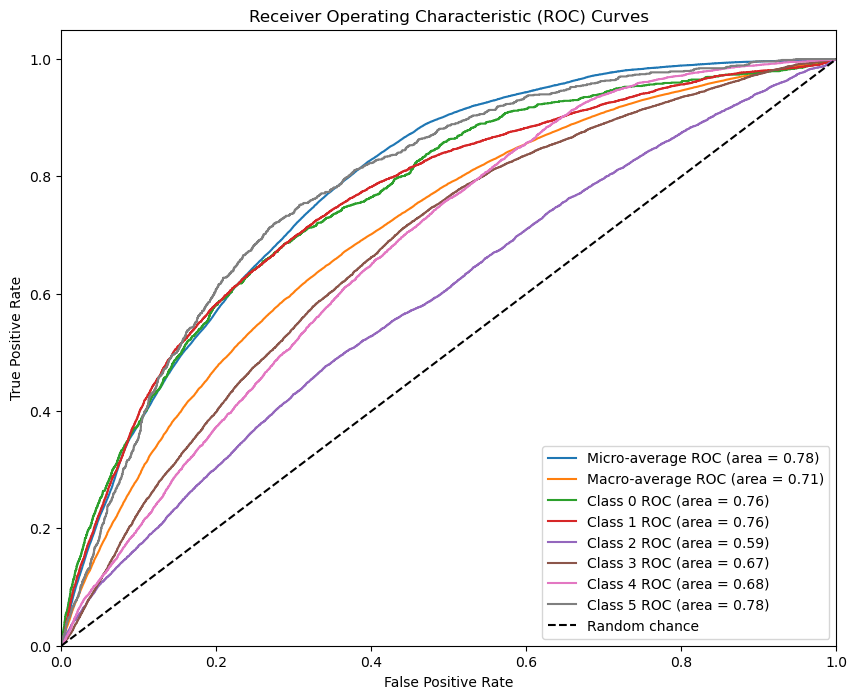

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
# Binarize y_test thành ma trận one-hot
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_test_bin.shape[1]

# Lấy score từ mô hình (SVC sử dụng predict_proba)
y_score = svc.predict_proba(X_test)

# Tính toán ROC và AUC cho từng lớp
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tính ROC và AUC cho micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Tính ROC và AUC cho macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Vẽ đồ thị ROC
plt.figure(figsize=(10, 8))

# Vẽ micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC (area = {roc_auc["micro"]:.2f})')

# Vẽ macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average ROC (area = {roc_auc["macro"]:.2f})')

# Vẽ ROC curve cho từng lớp
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC (area = {roc_auc[i]:.2f})')

# Đường tham chiếu (random chance)
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

# Thiết lập nhãn và tiêu đề
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')

# Thêm chú thích
plt.legend(loc='lower right')

# Hiển thị đồ thị
plt.show()


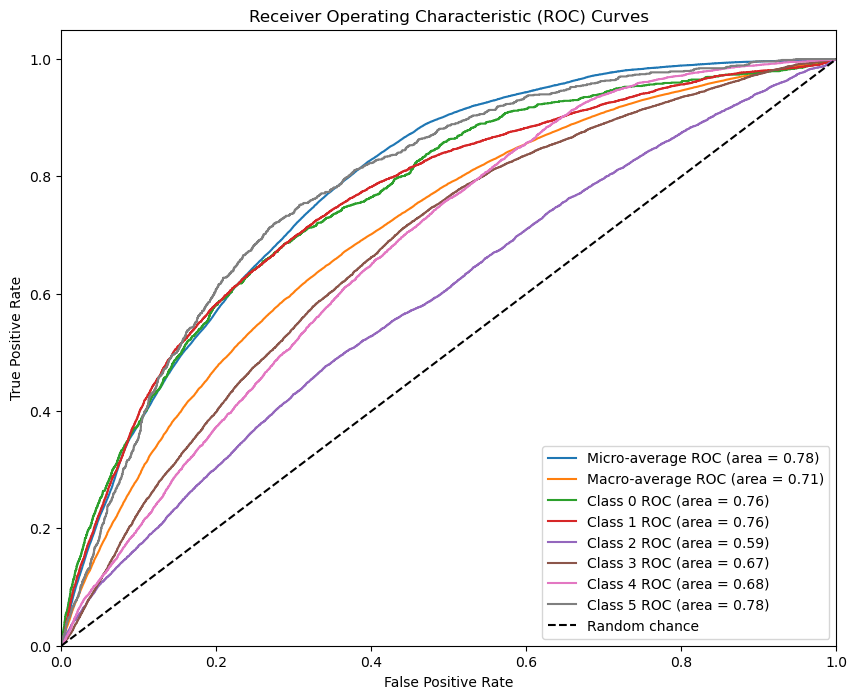

Hình ảnh đã được lưu tại 'C:\Users\manht\Data Mining sem 2\roc_curve_non_linear_svc.png'


In [17]:
import os

# Định nghĩa đường dẫn lưu tệp
save_path = r'C:\Users\manht\Data Mining sem 2\roc_curve_non_linear_svc.png'

# Vẽ đồ thị ROC
plt.figure(figsize=(10, 8))

# Vẽ micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC (area = {roc_auc["micro"]:.2f})')

# Vẽ macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], label=f'Macro-average ROC (area = {roc_auc["macro"]:.2f})')

# Vẽ ROC curve cho từng lớp
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC (area = {roc_auc[i]:.2f})')

# Đường tham chiếu (random chance)
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

# Thiết lập nhãn và tiêu đề
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')

# Thêm chú thích
plt.legend(loc='lower right')

# Lưu hình ảnh vào tệp
plt.savefig(save_path)

# Hiển thị đồ thị
plt.show()

# Thông báo về vị trí tệp đã lưu
print(f"Hình ảnh đã được lưu tại '{save_path}'")


In [33]:
# 1. Khởi tạo và huấn luyện mô hình (như code của bạn)
svc1 = SVC(C=100, gamma=0.001, kernel='rbf', class_weight='balanced', random_state=42)
svc1.fit(X_train, y_train)

# 2. Đánh giá trên TẬP HUẤN LUYỆN (TRAINING SET)
print("--- ĐÁNH GIÁ TRÊN TẬP HUẤN LUYỆN ---")
y_pred_train = svc1.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(classification_report(y_train, y_pred_train, digits=4))
print("-" * 40)

# 3. Đánh giá trên TẬP KIỂM TRA (TEST SET)
print("--- ĐÁNH GIÁ TRÊN TẬP KIỂM TRA ---")
y_pred_test = svc1.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_pred_test, digits=4))
print("-" * 40)


# 4. So sánh và kết luận
print("\n--- KẾT LUẬN OVERFITTING ---")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:     {test_accuracy:.4f}")
difference = train_accuracy - test_accuracy
print(f"Chênh lệch:        {difference:.4f}")

--- ĐÁNH GIÁ TRÊN TẬP HUẤN LUYỆN ---
Training Accuracy: 0.2706
              precision    recall  f1-score   support

           0     0.0977    0.4906    0.1629      3606
           1     0.4320    0.3976    0.4141     21089
           2     0.4524    0.0963    0.1588     26986
           3     0.4986    0.3028    0.3768     33600
           4     0.2470    0.2008    0.2216     15325
           5     0.0740    0.6803    0.1335      2987

    accuracy                         0.2706    103593
   macro avg     0.3003    0.3614    0.2446    103593
weighted avg     0.4096    0.2706    0.2902    103593

----------------------------------------
--- ĐÁNH GIÁ TRÊN TẬP KIỂM TRA ---
Test Accuracy: 0.2658
              precision    recall  f1-score   support

           0     0.0960    0.4835    0.1602      1545
           1     0.4347    0.3952    0.4140      9039
           2     0.4321    0.0928    0.1528     11565
           3     0.4918    0.3001    0.3727     14400
           4     0.2318  

In [34]:
# 1. Khởi tạo và huấn luyện mô hình (như code của bạn)
svc2 = SVC(C=10, gamma='scale', kernel='sigmoid',  class_weight='balanced', random_state=42)
svc2.fit(X_train, y_train)

# 2. Đánh giá trên TẬP HUẤN LUYỆN (TRAINING SET)
print("--- ĐÁNH GIÁ TRÊN TẬP HUẤN LUYỆN ---")
y_pred_train = svc2.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(classification_report(y_train, y_pred_train, digits=4))
print("-" * 40)

# 3. Đánh giá trên TẬP KIỂM TRA (TEST SET)
print("--- ĐÁNH GIÁ TRÊN TẬP KIỂM TRA ---")
y_pred_test = svc2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_pred_test, digits=4))
print("-" * 40)


# 4. So sánh và kết luận
print("\n--- KẾT LUẬN OVERFITTING ---")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:     {test_accuracy:.4f}")
difference = train_accuracy - test_accuracy
print(f"Chênh lệch:        {difference:.4f}")

--- ĐÁNH GIÁ TRÊN TẬP HUẤN LUYỆN ---
Training Accuracy: 0.1602
              precision    recall  f1-score   support

           0     0.0402    0.3747    0.0727      3606
           1     0.2498    0.2182    0.2329     21089
           2     0.2657    0.0642    0.1034     26986
           3     0.3851    0.1652    0.2312     33600
           4     0.1582    0.1554    0.1568     15325
           5     0.0626    0.3274    0.1051      2987

    accuracy                         0.1602    103593
   macro avg     0.1936    0.2175    0.1504    103593
weighted avg     0.2716    0.1602    0.1781    103593

----------------------------------------
--- ĐÁNH GIÁ TRÊN TẬP KIỂM TRA ---
Test Accuracy: 0.1575
              precision    recall  f1-score   support

           0     0.0422    0.3968    0.0763      1545
           1     0.2401    0.2065    0.2221      9039
           2     0.2454    0.0607    0.0973     11565
           3     0.3854    0.1630    0.2291     14400
           4     0.1632  